In [31]:
import numpy as np
import pandas as pd

# **Plan Of Attack**
    - Data Cleaning
    - EDA
    - Text PreProcessing
    - Model Building
    - Evaluation
    - Improvement
    - Website
    - Deploy

In [32]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [33]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# Step 1 : Data Cleaning

- Check wheter the three unnamed cols are of any work or not

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


- As there are alot of values missing in these last three unnamed cols so we will drop these cols

In [35]:
# drop last three cols
df.drop(columns=['Unnamed: 2',	'Unnamed: 3',	'Unnamed: 4'], inplace=True)

In [36]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


- Now the column names does not make any sense so we will rename the cols names to Target and Text

In [37]:
# renaming Cols
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [84]:
df[df['target']==1]['text'].to_csv('spam_sms.csv')

- so there are two classes in target Ham and Spam, Understandable
- but we have to convert it into vectors so the model will work

In [38]:
# Encoding the Target Variable
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

- 0 means Not Spam and 1 means Spam

In [39]:
df= df[['text','target']]

In [40]:
# Missing Values
df.isnull().sum()

text      0
target    0
dtype: int64

In [41]:
# Duplicated Values
df.duplicated().sum()

403

In [42]:
# drop duplicates

df = df.drop_duplicates(keep='first')


In [43]:
df.duplicated().sum()

0

In [44]:
df.shape

(5169, 2)

- **Now the Basic Cleaning Part have been completed and We will move towards the EDA**



---

# **Step 2 : EDA**

In [45]:
# Check distribution of the data - balanced or unbalanced

df['target'].value_counts()


target
0    4516
1     653
Name: count, dtype: int64

- **here we can see that data is Unbalanced and More bend to Not Spam side**

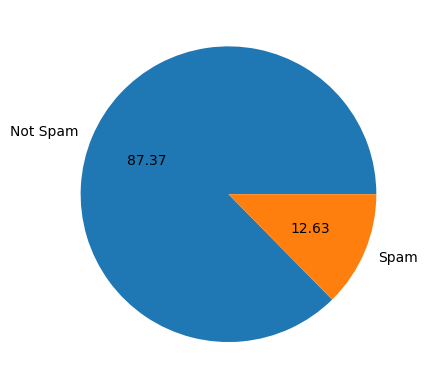

In [46]:
# visulize
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels=['Not Spam', 'Spam'], autopct="%0.2f")
plt.show()

- Now for deeper Analysis we will add three more cols Extracted from Data
  1. Length of Message (num_characters)
  2. No of words
  3. No of Sentences

In [49]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Adnan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Adnan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [50]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [51]:
df.head()

,text,target,num_characters,num_words,num_sentences
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2
1,Ok lar... Joking wif u oni...,0,29,8,2
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2
3,U dun say so early hor... U c already then say...,0,49,13,1
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1


In [52]:
df.describe()

,target,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [53]:
# separatly describe Spam and not Spam

# not Spam

df[df['target']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [54]:

# Spam

df[df['target']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


- from The description it is clear that average spam SMS is larger than a not SPAM SMS

- Lets Plot the data

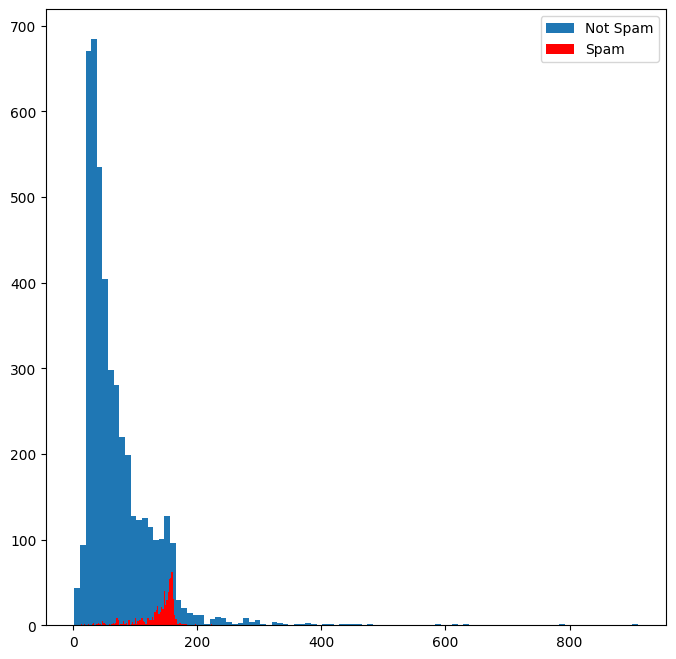

In [55]:
plt.figure(figsize=(8,8))
plt.hist(df[df['target']==0]['num_characters'], bins=100, label='Not Spam')
plt.hist(df[df['target']==1]['num_characters'], bins=100, color='red', label='Spam')
plt.legend()
plt.show()

- Most of the Not Spam are of less num of characters
- Most of the Spam are of Greater num of Characters

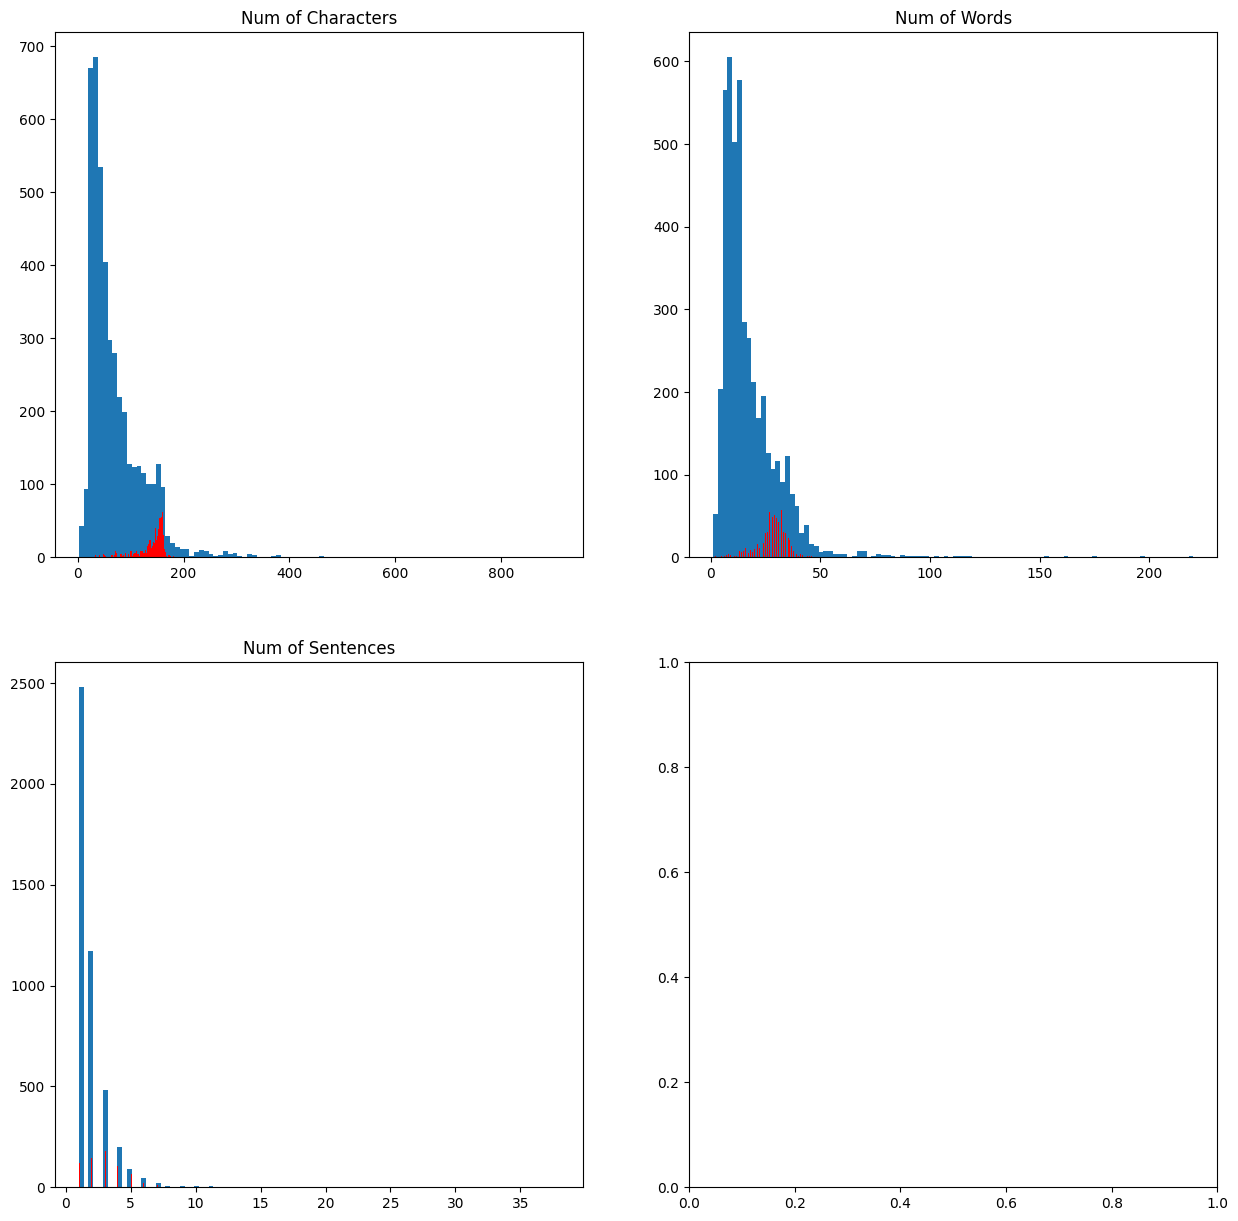

In [56]:
# Same for Num of Words and Num of Sentences

figure, ax = plt.subplots(2,2, figsize=(15,15))

ax[0,0].hist(df[df['target']==0]['num_characters'], bins=100, label='Not Spam')
ax[0,0].hist(df[df['target']==1]['num_characters'], bins=100, color='red', label='Spam')
ax[0,0].set_title('Num of Characters')

ax[0,1].hist(df[df['target']==0]['num_words'], bins=100, label='Not Spam')
ax[0,1].hist(df[df['target']==1]['num_words'], bins=100, color='red', label='Spam')
ax[0,1].set_title('Num of Words')

ax[1,0].hist(df[df['target']==0]['num_sentences'], bins=100, label='Not Spam')
ax[1,0].hist(df[df['target']==1]['num_sentences'], bins=100, color='red', label='Spam')
ax[1,0].set_title('Num of Sentences')

plt.show()

- **Same as the Num of Characters other cols are also larger for Spam and most are smaller in Not Spam**

### Lets Analyze the Relation of Cols with each other

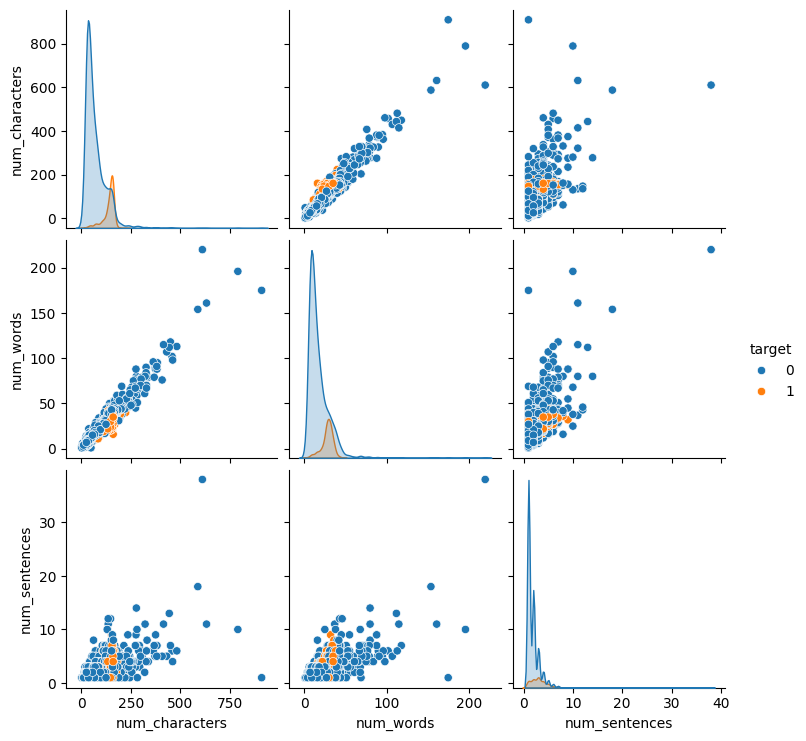

In [57]:
import seaborn as sns

sns.pairplot(df, hue='target')

- Here we can see that there are outliers
- The linearity of data

### lets check Multicollinearity


<Axes: >

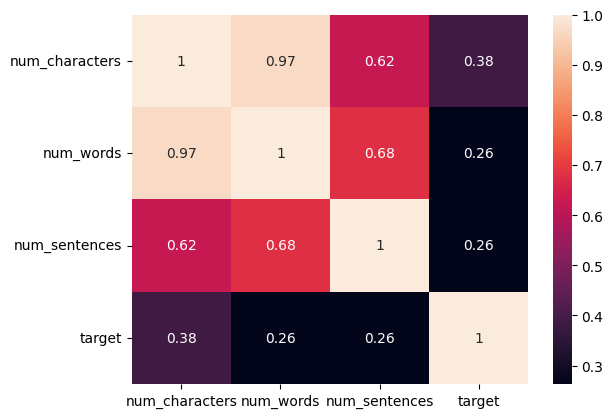

In [58]:
sns.heatmap(df[['num_characters', 'num_words', 'num_sentences', 'target']].corr(), annot=True)

### Conlcuded that The cols are highly correlated so will affect the model, so we have to chose one, we will go for no of characters

# **Step 3 : Text Preprocessing**
    1. lower case
    2. tokeniztion
    3. remove special characters
    4. remove stop words and punctuation
    5. Stemming

In [59]:
# lower case
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string


def transform_text(text):
  text = text.lower() # lower
  text = nltk.word_tokenize(text) # tokenize , list return

  # remove special

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  # stemming : making the words to root word :: Loving , loved ==> Love
  text = y[:]
  ps = PorterStemmer()
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adnan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [60]:
# apply transformation

df['transformed_text'] = df['text'].apply(transform_text)

In [61]:
df.head()

,text,target,num_characters,num_words,num_sentences,transformed_text
0,"Go until jurong point, crazy.. Available only ...",0,111,24,2,go jurong point crazi avail bugi n great world...
1,Ok lar... Joking wif u oni...,0,29,8,2,ok lar joke wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,U dun say so early hor... U c already then say...,0,49,13,1,u dun say earli hor u c alreadi say
4,"Nah I don't think he goes to usf, he lives aro...",0,61,15,1,nah think goe usf live around though


### Let Head towards the Interpretability of the data

    - Finding the most occuring words in both spam and Ham messages

In [62]:
from wordcloud import WordCloud

# Spam
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

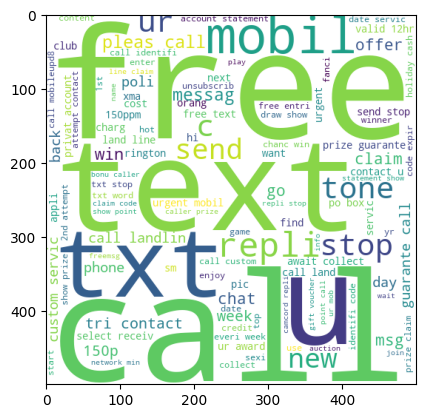

In [63]:
plt.imshow(spam_wc)

In [64]:
# Hpam
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

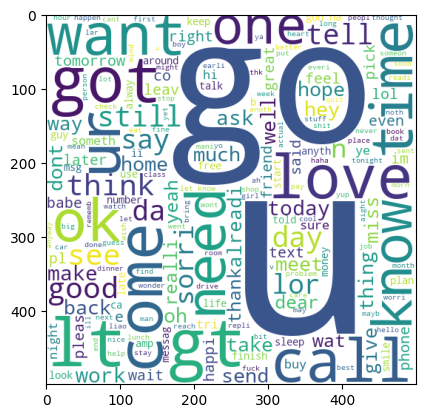

In [65]:
plt.imshow(ham_wc)

### Taking out the most 50 words that are most common or most repeated in Spam and Ham

In [66]:
# Spam Most common 50 words

from collections import Counter
corpus_spam=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    corpus_spam.append(word)

# word with its frequency
spam_mostcommon = Counter(corpus_spam).most_common(50)



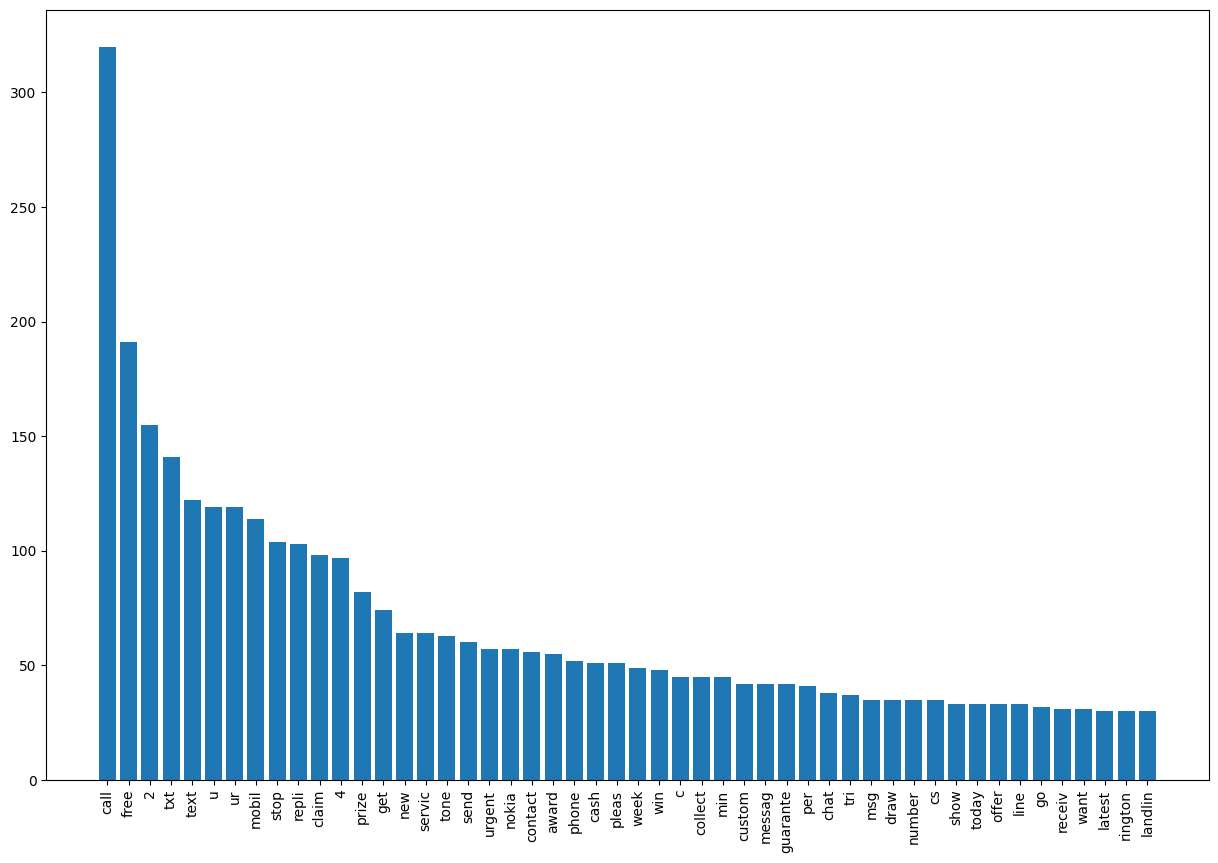

In [67]:
plt.figure(figsize=(15,10))
plt.bar(pd.DataFrame(spam_mostcommon)[0], pd.DataFrame(spam_mostcommon)[1])
plt.xticks(rotation='vertical')
plt.show()

In [68]:
corpus_ham=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
  for word in msg.split():
    corpus_ham.append(word)

# word with its frequency
ham_mostcommon = Counter(corpus_ham).most_common(50)


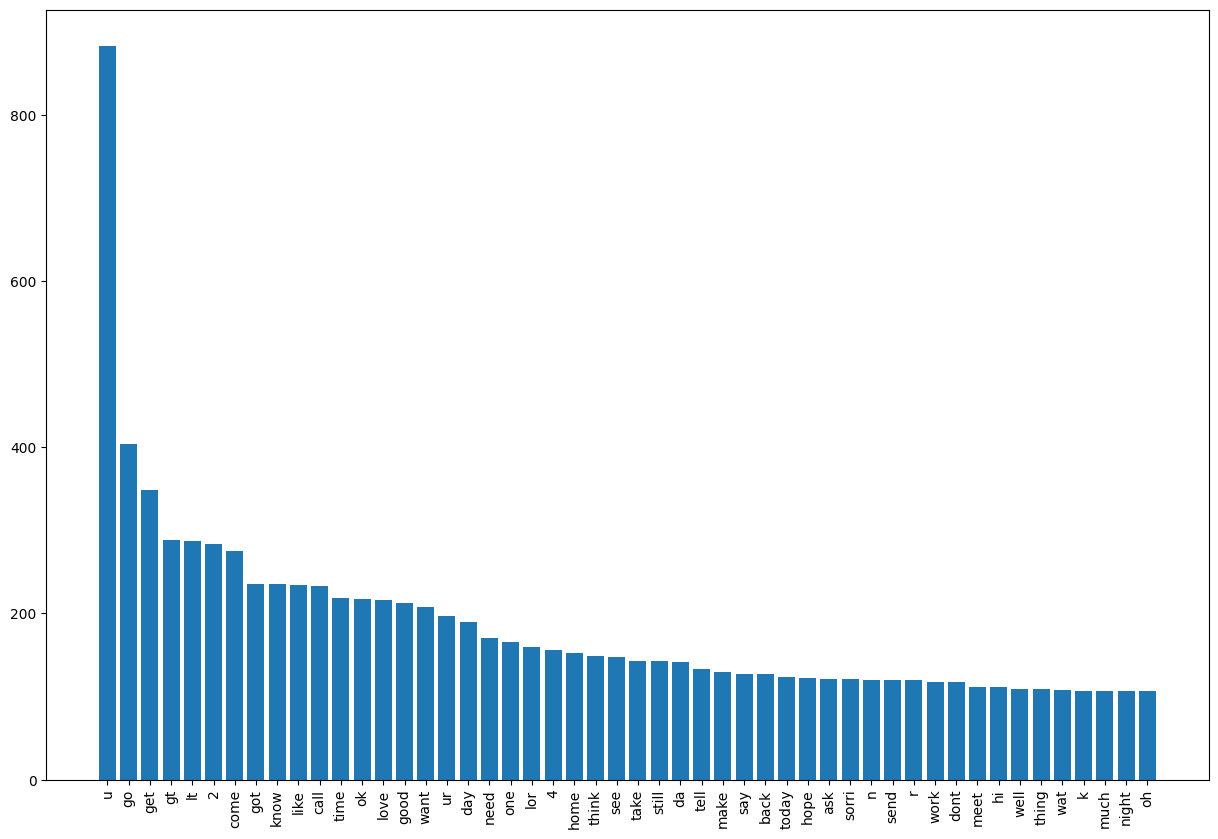

In [69]:
plt.figure(figsize=(15,10))
plt.bar(pd.DataFrame(ham_mostcommon)[0], pd.DataFrame(ham_mostcommon)[1])
plt.xticks(rotation='vertical')
plt.show()

### Thats where We End Our this Step of Preproceesing And EDA

---

# **Step 4 : Model Building**

    - It is known that for textual data mostly Naive Bayes Algos are Used
    - We will also go for other but will try the Naive one first
--
  - **Plan**
    1. Encoding the Input data because The Input should be numerical
    2. Models test and Evaluate
    



In [70]:
# we will go for count Vectorizer ==> Input in X

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
cv = CountVectorizer()

In [71]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [72]:
y = df['target'].values

In [73]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [74]:
# Model Training

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=2)

In [75]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [76]:
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()

In [77]:
gnb.fit(X_train, y_train)
ypred_1 = gnb.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, ypred_1))
print('Confusion Matrix Score: ',confusion_matrix(y_test, ypred_1))
print('P_score Score: ',precision_score(y_test, ypred_1))


Accuracy Score:  0.8694390715667312
Confusion Matrix Score:  [[788 108]
 [ 27 111]]
P_score Score:  0.5068493150684932


In [78]:
bnb.fit(X_train, y_train)
ypred_2 = bnb.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, ypred_2))
print('Confusion Matrix Score: ',confusion_matrix(y_test, ypred_2))
print('P_score Score: ',precision_score(y_test, ypred_2))


Accuracy Score:  0.9835589941972921
Confusion Matrix Score:  [[895   1]
 [ 16 122]]
P_score Score:  0.991869918699187


In [79]:
mnb.fit(X_train, y_train)
ypred_3 = mnb.predict(X_test)
print('Accuracy Score: ', accuracy_score(y_test, ypred_3))
print('Confusion Matrix Score: ',confusion_matrix(y_test, ypred_3))
print('P_score Score: ',precision_score(y_test, ypred_3))


Accuracy Score:  0.9709864603481625
Confusion Matrix Score:  [[896   0]
 [ 30 108]]
P_score Score:  1.0


- **As the Data is Imbalanced So Precision Score will matter**
- As Multinomial is working with very good with precision Score

---

# **Step 5 : Model Improve**

  - Change Max Features of tfidf Vectorizer
  - after adjusting I got 3000 as improving Factor
  - Change it and Come Back
  - Now the accuracy of the multinomial will be improved maitaining the Precision Score




In [80]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))